# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load and Read the File

In [6]:
df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\task 5\\RTA Dataset.csv")

# Initial Inspection

In [9]:
print(df.head())


       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [11]:
print(df.shape)

(12316, 32)


In [13]:
print(df.describe())

       Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000


In [15]:
print(df.describe(include="all"))

            Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   
mean         NaN         NaN                NaN           NaN   
std          NaN         NaN                NaN           NaN   
min          NaN         NaN                NaN           NaN   
25%          NaN         NaN                NaN           NaN   
50%          NaN         NaN                NaN           NaN   
75%          NaN         NaN                NaN           NaN   
max          NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [19]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


In [21]:
print(df['Accident_severity'].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


# Plotting Target Distribution

<Axes: xlabel='Accident_severity', ylabel='count'>

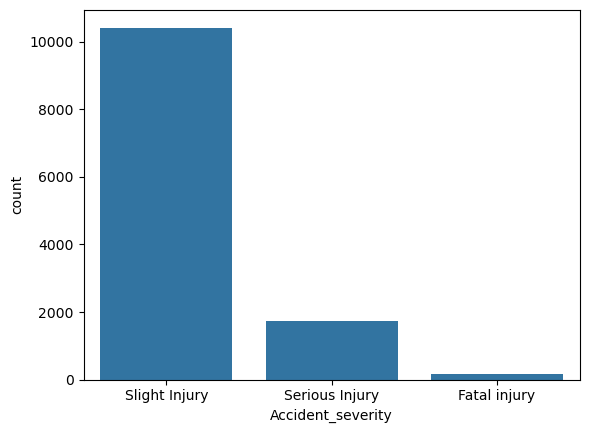

In [24]:
sns.countplot(x = df['Accident_severity'])

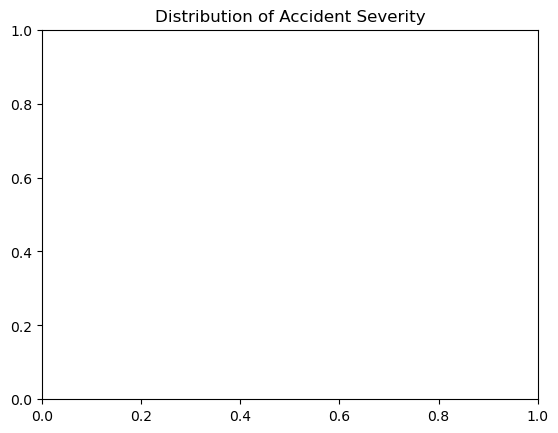

In [34]:
plt.title('Distribution of Accident Severity')
plt.show()

# Missing Values

In [37]:
print(df.isna().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

# Dropping Unnecessary Columns

In [40]:
df.drop(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
         'Fitness_of_casuality', 'Time'], axis=1, inplace=True)


# Categorical Variable Detection

In [44]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
print('Categorical Variables:', categorical)


Categorical Variables: ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


# Filling Missing Categorical Values with Mode

In [47]:
for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [49]:
print(df.isna().sum())

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64


# Scatter and Joint Plot

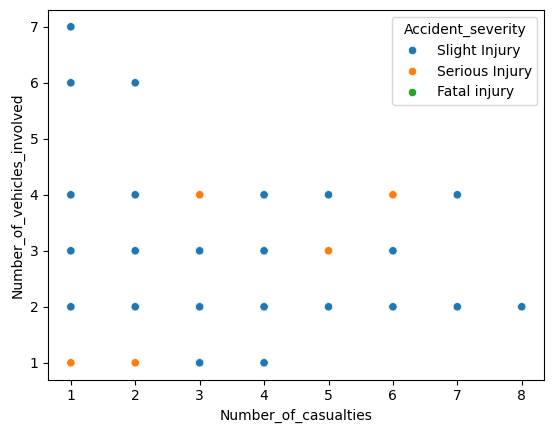

In [52]:
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
plt.show()

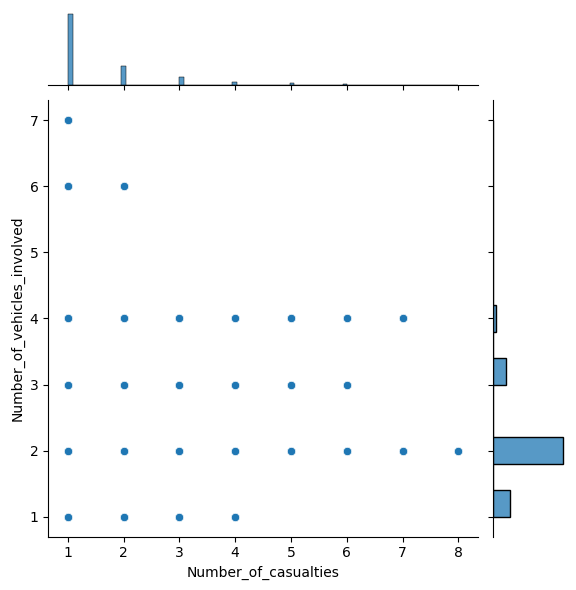

In [54]:
sns.jointplot(x='Number_of_casualties', y='Number_of_vehicles_involved', data=df)
plt.show()

# Correlation Heatmap

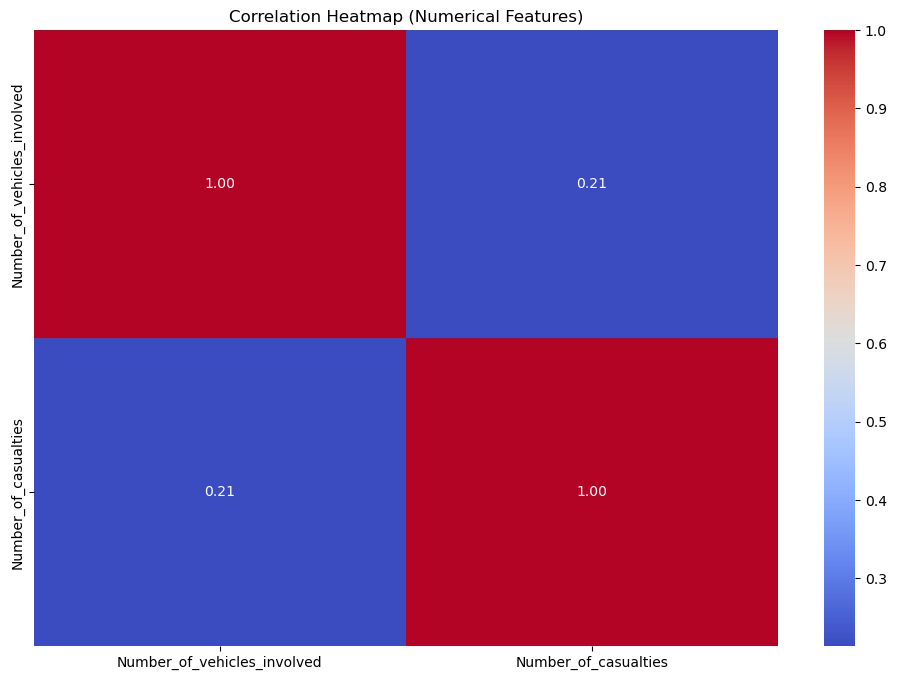

In [59]:
# Correlation Heatmap (Only Numeric Columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# Plotting Numerical Features

In [62]:
numerical = [i for i in df.columns if df[i].dtype != 'O']
print('Numerical Variables:', numerical)

Numerical Variables: ['Number_of_vehicles_involved', 'Number_of_casualties']


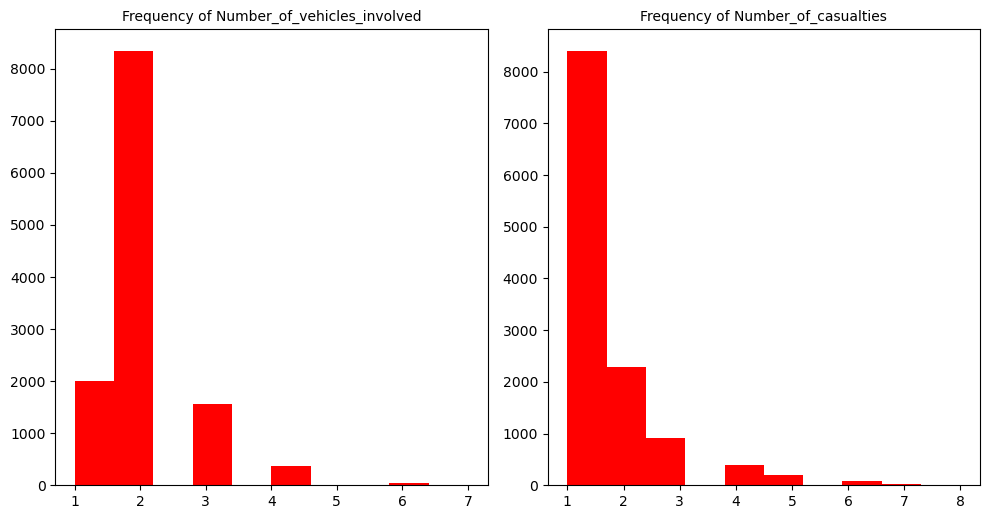

In [64]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2, 2, plotnumber)
        plt.hist(df[i], color='red')
        plt.title('Frequency of ' + i, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

# Categorical Variable Countplots

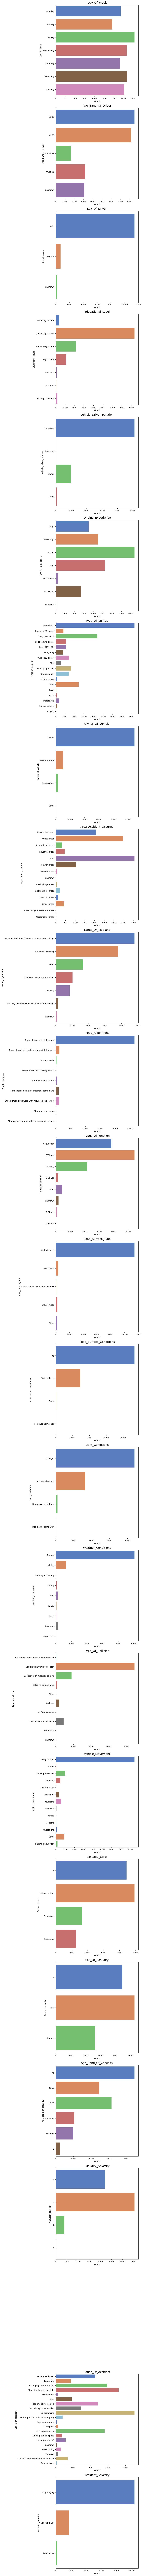

In [67]:
plt.figure(figsize=(10, 200))
plotnumber = 1
for col in categorical:
    if plotnumber <= df.shape[1] and col != 'Pedestrian_movement':
        ax1 = plt.subplot(28, 1, plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.title(col.title(), fontsize=14)
    plotnumber += 1
plt.tight_layout()
plt.show()

# Label Encoding for Chi-square Test

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = pd.DataFrame()

for col in categorical:
    if col != 'Accident_severity':
        df1[col] = le.fit_transform(df[col])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int32
 1   Age_band_of_driver       12316 non-null  int32
 2   Sex_of_driver            12316 non-null  int32
 3   Educational_level        12316 non-null  int32
 4   Vehicle_driver_relation  12316 non-null  int32
 5   Driving_experience       12316 non-null  int32
 6   Type_of_vehicle          12316 non-null  int32
 7   Owner_of_vehicle         12316 non-null  int32
 8   Area_accident_occured    12316 non-null  int32
 9   Lanes_or_Medians         12316 non-null  int32
 10  Road_allignment          12316 non-null  int32
 11  Types_of_Junction        12316 non-null  int32
 12  Road_surface_type        12316 non-null  int32
 13  Road_surface_conditions  12316 non-null  int32
 14  Light_conditions         12316 non-null  int32
 15  We

# Chi-square Analysis

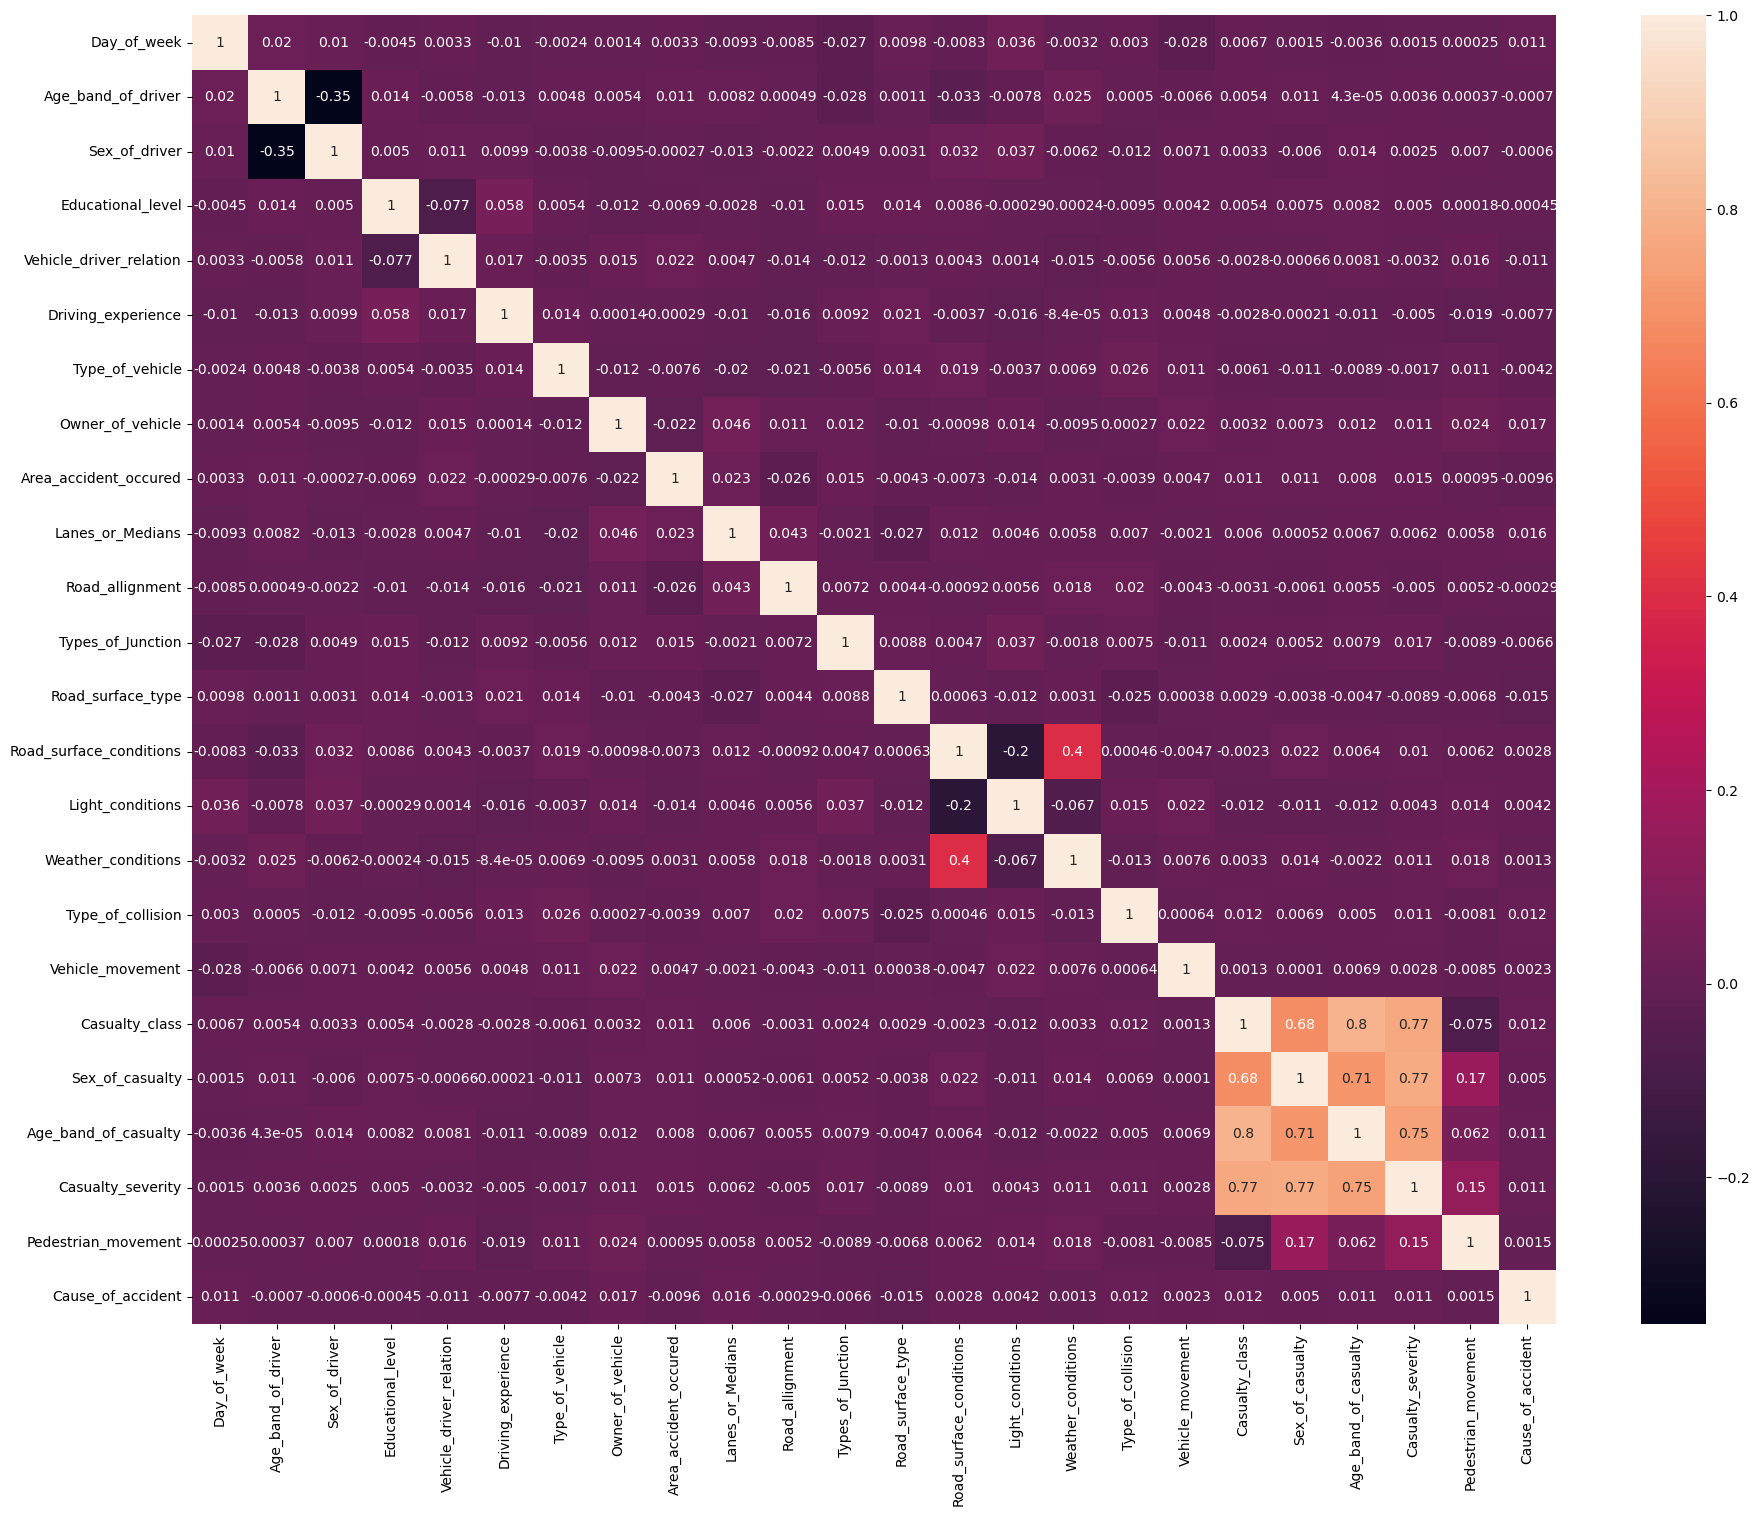

In [73]:
plt.figure(figsize=(22, 17))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [75]:
from sklearn.feature_selection import chi2
f_p_values = chi2(df1, df['Accident_severity'])

In [77]:
f_p_values1 = pd.DataFrame({'features': df1.columns, 'Fscore': f_p_values[0], 'Pvalues': f_p_values[1]})
f_p_values1.sort_values(by='Pvalues', ascending=True)

,features,Fscore,Pvalues
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


# Dropping Less Important Features Based on Chi-square

In [80]:
df2 = df.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
               'Casualty_severity', 'Educational_level', 'Day_of_week', 'Sex_of_driver',
               'Road_allignment', 'Sex_of_casualty'], axis=1)

# One-Hot Encoding Selected Categorical Columns

In [83]:
categorical_new = [col for col in df2.columns if df2[col].dtype == 'O']
print("Categorical Columns After Filtering:", categorical_new)

Categorical Columns After Filtering: ['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident', 'Accident_severity']


In [85]:
for col in categorical_new:
    print(df2[col].value_counts())

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64
Driving_experience
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64
Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas          

In [87]:
dummy = pd.get_dummies(df2[categorical_new], drop_first=True)

# Concatenating Encoded Features

In [90]:
df3 = pd.concat([df2, dummy], axis=1)
df3.drop(categorical_new, axis=1, inplace=True)

# Defining Features and Target

In [95]:
print('Accident_severity' in df3.columns)
print(df3.columns)


False
Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51',
       'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown',
       'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner',
       'Vehicle_driver_relation_Unknown', 'Driving_experience_2-5yr',
       ...
       'Cause_of_accident_No priority to vehicle', 'Cause_of_accident_Other',
       'Cause_of_accident_Overloading', 'Cause_of_accident_Overspeed',
       'Cause_of_accident_Overtaking', 'Cause_of_accident_Overturning',
       'Cause_of_accident_Turnover', 'Cause_of_accident_Unknown',
       'Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'],
      dtype='object', length=106)


In [97]:
# Recreate df3 properly
df3 = pd.concat([df2[['Accident_severity']], dummy, df2[numerical]], axis=1)

# Define features and target
X = df3.drop(['Accident_severity'], axis=1)
y = df3['Accident_severity']


In [99]:
df3


,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,...,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Serious Injury,Accident_severity_Slight Injury,Number_of_vehicles_involved,Number_of_casualties
0,Slight Injury,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,2
1,Slight Injury,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,2,2
2,Serious Injury,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,2,2
3,Slight Injury,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,2,2
4,Slight Injury,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Slight Injury,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,2,1
12312,Slight Injury,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,2,1
12313,Serious Injury,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,1,1
12314,Slight Injury,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,1


# Visualizing Class Imbalance

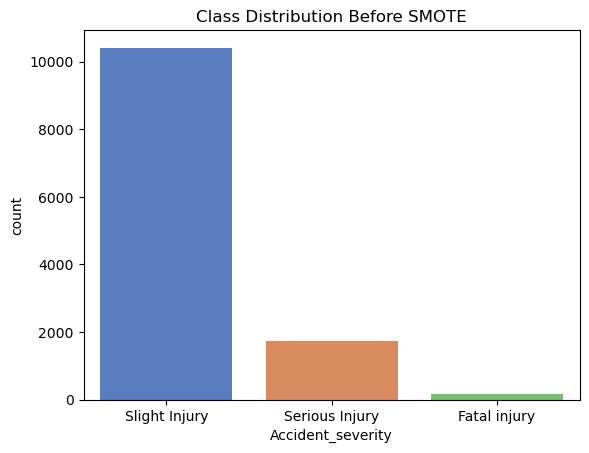

In [102]:
sns.countplot(x=y, palette='muted')
plt.title("Class Distribution Before SMOTE")
plt.show()

# Applying SMOTE

In [105]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)

# Visualizing After SMOTE

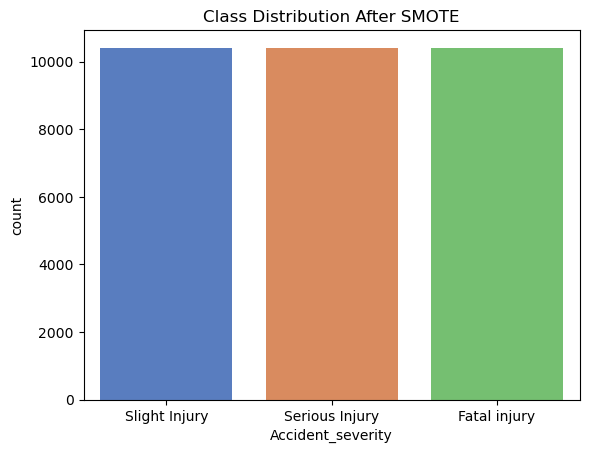

In [108]:
sns.countplot(x=y_res, palette='muted')
plt.title("Class Distribution After SMOTE")
plt.show()

# Train-Test Split

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(21871, 106) (9374, 106) (21871,) (9374,)


# KNN Model Training

In [116]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()